In [3]:
# First, create an undefined function by passing cls=Function to the symbols function.
from sympy import symbols, Function
x, y, z = symbols('x y z')
f = symbols('f', cls=Function)

In [9]:
f(x)

f(x)

### solving a first order differential equation
$$
\frac{d f(x)}{dx} + 3f(x) = 6x.
$$


In [13]:
# first write the differential equation
from sympy import Eq , dsolve

diff_equn = Eq(f(x).diff(x) + 3*f(x), 6*x)
diff_equn

Eq(3*f(x) + Derivative(f(x), x), 6*x)

In [16]:
# use dsolve
solution = dsolve(diff_equn, f(x)) 
solution

Eq(f(x), C1*exp(-3*x) + 2*x - 2/3)

In [28]:
# apply initial condition
from sympy.plotting import plot
particular_solution = solution.rhs.subs('C1', 0)
particular_solution

2*x - 2/3

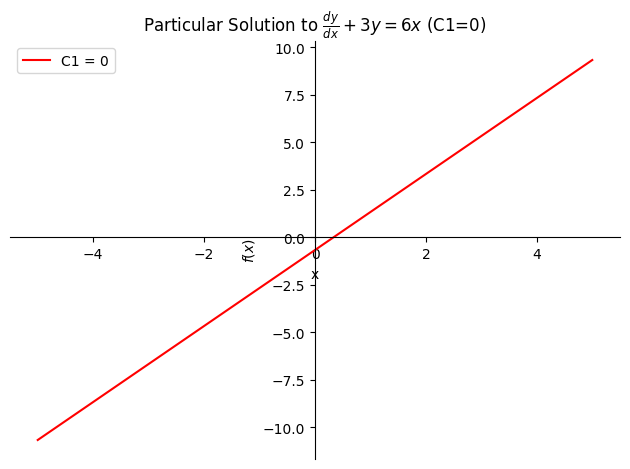

In [30]:
p = plot(
    (particular_solution, (x, -5, 5)),    # (expression, (variable, min, max))
    title="Particular Solution to $\\frac{dy}{dx} + 3y = 6x$ (C1=0)",
    xlabel="x",
    ylabel="$f(x)$",
    legend=True,
    label="C1 = 0",
    line_color='red'
)


### plot it using matplotlib
convert the symbolic solution into a numeric (callable) function using Sympy’s lambdify function

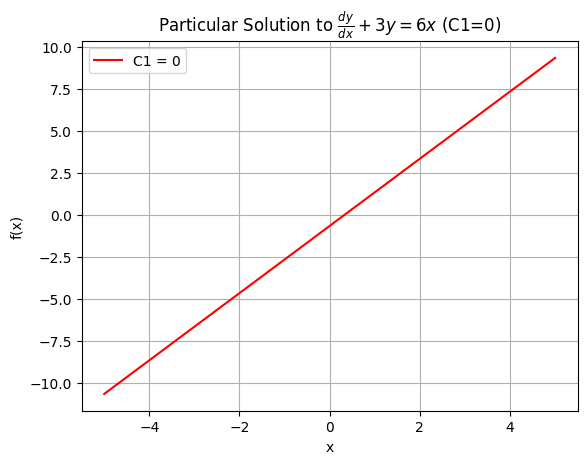

In [34]:
from sympy import lambdify
import numpy as np
import matplotlib.pyplot as plt

f_numeric = lambdify(x, particular_solution, 'numpy')
x_vals = np.linspace(-5, 5, 100)
y_vals = f_numeric(x_vals)

plt.plot(x_vals, y_vals, label='C1 = 0', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.title('Particular Solution to $\\frac{dy}{dx} + 3y = 6x$ (C1=0)')
plt.show()
